# Polynomial Regression

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values #we just want to get from collumn level. not name. so we start from 1
y = dataset.iloc[:, -1].values

## Training the Linear Regression model on the whole dataset

In [11]:
from sklearn.linear_model import LinearRegression #importar classe LinearRegression
lin_reg = LinearRegression() #criar instancia
lin_reg.fit(X, y) #fit method --> treina o regression model

LinearRegression()

## Training the Polynomial Regression model on the whole dataset

In [12]:
from sklearn.preprocessing import PolynomialFeatures # para construir matriz com coeficientes para cada x^1, x^2,...x^n
poly_reg = PolynomialFeatures(degree = 4) #vamos comecar com um polinomial linear regression de dois. depois pode-se aumentar e testar
#com degree 4 verificou-se que ficou mais proximo dos dados treino
X_poly = poly_reg.fit_transform(X) #matriz de features que queremos transformar? X obviamente. São as variaveis independentes.
#X_poly fica essa matriz das features

#Agora queremos implementar a linear regression à poly criada anteriormente
#Atencao - nao se gera uma relacao linear, mas como se somam os coeficientes como se faz na linear, é igual
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y) #polynomial regression model com o linear

LinearRegression()

## Visualising the Linear Regression results

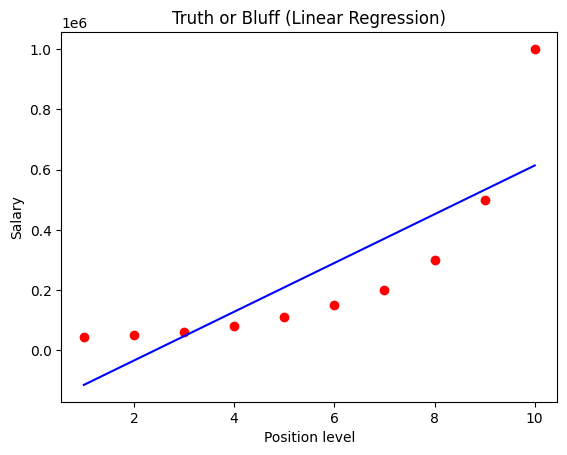

In [13]:
plt.scatter(X, y, color = 'red') #mostrar dados reais
plt.plot(X, lin_reg.predict(X), color = 'blue') #mostrar regressao linear aplicada a X. cor blue
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Visualising the Polynomial Regression results

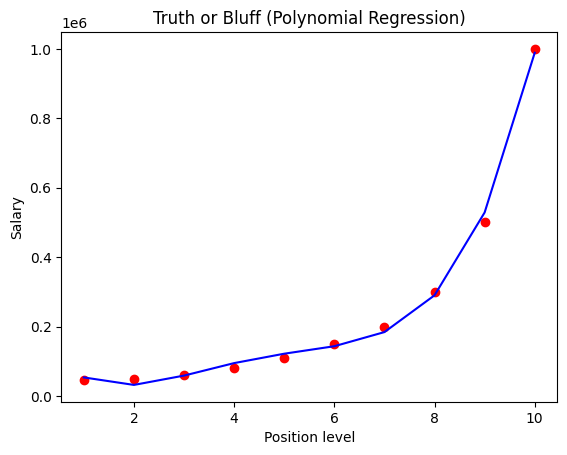

In [14]:
plt.scatter(X, y, color = 'red') #mostrar dados reais
plt.plot(X, lin_reg_2.predict(X_poly), color = 'blue') #mostrar regressao linear aplicada a X. cor blue
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the Polynomial Regression results (for higher resolution and smoother curve)

/tmp/ipython-input-15-623877667.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


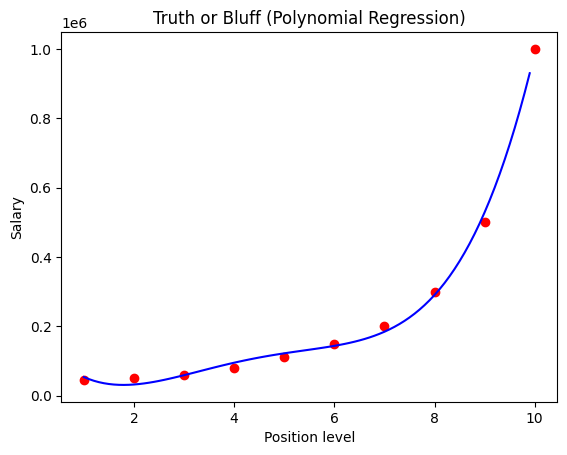

In [15]:
# basicamente esta implementacao permite visualizar melhor a curva conseguida
#como? Em vez de ter os valores que estao associados aos respetivos graus,
#ex: 1 é este, 2 é aquele e unindo cada um por pontos
# ficamos com 1.1 é este, 1.2. é aquele 1.3.... etc.
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predicting a new result with Linear Regression

In [16]:
lin_reg.predict([[6.5]]) #pegamos no objeto de lin reg criado antes e metemos o valor 6.5 (o que queremos predict)
#[[]] porque precisamos de meter como input um array.
# e isso acede às colunas.
#ex: [[6.5,5]] duas colunas numa so linha. [[6.5,5],[2,3]] - duas linhas e duas colunas
# deu 330k. Não faz sentido com o dados treino. Portanto vamos experimentar
#na polynomial regression

array([330378.78787879])

## Predicting a new result with Polynomial Regression

In [17]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))
#objeto da polinomial regression
#e depois temos que atualizar os respetivos coeficientes com 6.5, portanto
#necessita-se do poly_reg.fit_transform
#deu 159k. Muito mais perto do que a pessoa disse (160k) portanto
#foi uma pessoa honesta.

array([158862.45265155])